# Analysis of MovieLens dataset (Beginner'sAnalysis)
https://www.kaggle.com/jneupane12/analysis-of-movielens-dataset-beginner-sanalysis

In [1]:
import sys
print(sys.executable)

E:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\python.exe


In [2]:
import os
os.environ['PATH']

'C:\\Users\\mazha\\AppData\\Roaming\\Python\\Python37\\site-packages\\pywin32_system32;E:\\ProgramData\\Anaconda3\\envs\\tensorflow_gpuenv;E:\\ProgramData\\Anaconda3\\envs\\tensorflow_gpuenv\\Library\\mingw-w64\\bin;E:\\ProgramData\\Anaconda3\\envs\\tensorflow_gpuenv\\Library\\usr\\bin;E:\\ProgramData\\Anaconda3\\envs\\tensorflow_gpuenv\\Library\\bin;E:\\ProgramData\\Anaconda3\\envs\\tensorflow_gpuenv\\Scripts;E:\\ProgramData\\Anaconda3\\envs\\tensorflow_gpuenv\\bin;E:\\ProgramData\\Anaconda3;E:\\ProgramData\\Anaconda3\\Library\\mingw-w64\\bin;E:\\ProgramData\\Anaconda3\\Library\\usr\\bin;E:\\ProgramData\\Anaconda3\\Library\\bin;E:\\ProgramData\\Anaconda3\\Scripts;E:\\ProgramData\\Anaconda3\\bin;E:\\ProgramData\\Anaconda3;E:\\ProgramData\\Anaconda3\\Library\\mingw-w64\\bin;E:\\ProgramData\\Anaconda3\\Library\\usr\\bin;E:\\ProgramData\\Anaconda3\\Library\\bin;E:\\ProgramData\\Anaconda3\\Scripts;E:\\ProgramData\\Anaconda3\\bin;E:\\ProgramData\\Anaconda3;E:\\ProgramData\\Anaconda3\\Librar

## 1. First we import necessary Libaries

In [3]:
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import pandas as pd # pandas is a data manipulation library
import random
import matplotlib.pyplot as plt # data visualization library
import time
import datetime
import re

## 2.Reading and Exploring the Data

In [4]:
movies = pd.read_csv("datasets/movies.csv")
ratings = pd.read_csv("datasets/ratings.csv")
tags = pd.read_csv("datasets/tags.csv")

### 2.1 Load Movies Data

In [5]:
movies.sample(5)

,movieId,title,genres
4794,7142,Honey (2003),Drama|Romance
8285,105844,12 Years a Slave (2013),Drama
9154,147662,Return of the One-Armed Swordsman (1969),Action|Adventure
4090,5847,Ragtime (1981),Drama
6898,63540,Beverly Hills Chihuahua (2008),Adventure|Children|Comedy


In [6]:
movies.shape, movies.info(), len(movies['movieId'].unique().tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


((9742, 3), None, 9742)

### 2.2 Load Ratings Data

In [7]:
ratings.sample(5)

,userId,movieId,rating,timestamp
18992,122,33004,4.5,1461561774
25230,177,3098,4.0,1435535698
21461,140,4326,3.5,1055092309
62255,413,2329,5.0,1484439570
58045,380,147376,5.0,1493421859


In [8]:
ratings.shape, "\n", ratings.info(), "\n", len(ratings['movieId'].unique().tolist()), "\n", len(ratings['userId'].unique().tolist())
# ratings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


((100836, 4), '\n', None, '\n', 9724, '\n', 610)

### 2.3 Load Tags Data

In [9]:
tags.sample(5)

,userId,movieId,tag,timestamp
115,62,8641,Will Ferrell,1526249135
1068,474,280,prison,1137375585
76,62,3578,imdb top 250,1528152498
2415,474,27790,saints,1138040326
1612,474,2357,South America,1137205389


In [10]:
tags.shape, "\n", tags.info(), len(tags['tag'].unique().tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


((3683, 4), '\n', None, 1589)

## 3.Cleaning of data

In [11]:
movies.isnull().any(), " ", ratings.isnull().any(), " ", tags.isnull().any()

# # lets drop null rows
# tags=tags.dropna()

(movieId    False
 title      False
 genres     False
 dtype: bool,
 ' ',
 userId       False
 movieId      False
 rating       False
 timestamp    False
 dtype: bool,
 ' ',
 userId       False
 movieId      False
 tag          False
 timestamp    False
 dtype: bool)

## 4.Data Analysis

### 4.1 Make dates more readable

In [12]:
# https://stackoverflow.com/a/62968313/2049763
def timestamp_to_date_converter(t):
    # https://realpython.com/python-time-module/
    return datetime.datetime.fromtimestamp(t).strftime("%A, %B %d, %Y %I:%M:%S")

In [13]:
ratings['date'] = ratings['timestamp'].apply(timestamp_to_date_converter)
tags['date']    = tags['timestamp'].apply(timestamp_to_date_converter)

In [14]:
ratings.sort_values(by=['timestamp'], ascending=True).tail(5)

,userId,movieId,rating,timestamp,date
81475,514,187031,2.5,1537674927,"Saturday, September 22, 2018 10:55:27"
81477,514,187595,3.0,1537674946,"Saturday, September 22, 2018 10:55:46"
81336,514,5247,2.5,1537757040,"Sunday, September 23, 2018 09:44:00"
81335,514,5246,1.5,1537757059,"Sunday, September 23, 2018 09:44:19"
81092,514,162,4.0,1537799250,"Monday, September 24, 2018 09:27:30"


In [15]:
s = "01/01/2018"
t = time.mktime(datetime.datetime.strptime(s, "%m/%d/%Y").timetuple())

In [16]:
ratings.loc[ratings.timestamp>t].sort_values(by=['timestamp'], ascending=True).head(5)

,userId,movieId,rating,timestamp,date
7181,50,2420,2.5,1514842717,"Monday, January 01, 2018 03:38:37"
7357,50,117529,1.5,1514842744,"Monday, January 01, 2018 03:39:04"
7360,50,122904,1.5,1514891080,"Tuesday, January 02, 2018 05:04:40"
7299,50,72998,2.0,1514891142,"Tuesday, January 02, 2018 05:05:42"
7291,50,63312,2.0,1514891165,"Tuesday, January 02, 2018 05:06:05"


In [17]:
ratings.loc[ratings.timestamp>t].sort_values(by=['timestamp'], ascending=True).shape

(6413, 5)

### 4.2 Reading Movie Release Year

In [18]:
# https://stackoverflow.com/a/8569258
def title_to_release_year(s):
    m = re.findall(r"\(([0-9]+)\)", s)
    
    # https://www.guru99.com/python-regular-expressions-complete-tutorial.html
    if m is None or len(m) <= 0:
        return None        
    return m[-1]

In [19]:
movies['year']  = movies['title'].apply(title_to_release_year)

In [20]:
movies.sample(5)

,movieId,title,genres,year
4661,6963,Devil's Playground (2002),Documentary,2002
4843,7235,Ichi the Killer (Koroshiya 1) (2001),Action|Comedy|Crime|Drama|Horror|Thriller,2001
4279,6246,Talent for the Game (1991),Drama,1991
6781,60293,"Wackness, The (2008)",Comedy|Drama|Romance,2008
6602,55553,Black Sheep (2006),Comedy|Horror,2006


In [21]:
movies.isnull().any()

movieId    False
title      False
genres     False
year        True
dtype: bool

In [22]:
# https://datatofish.com/rows-with-nan-pandas-dataframe/
movies[movies.isnull().any(axis=1)]

,movieId,title,genres,year
6059,40697,Babylon 5,Sci-Fi,None
9031,140956,Ready Player One,Action|Sci-Fi|Thriller,None
9091,143410,Hyena Road,(no genres listed),None
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),None
9179,149334,Nocturnal Animals,Drama|Thriller,None
9259,156605,Paterson,(no genres listed),None
9367,162414,Moonlight,Drama,None
9448,167570,The OA,(no genres listed),None
9514,171495,Cosmos,(no genres listed),None
9515,171631,Maria Bamford: Old Baby,(no genres listed),None


In [23]:
movies = movies.dropna()

### 4.3 Preparing ratings data

In [24]:
ratings.userId = ratings.userId.astype('category').cat.codes.values
ratings.movieId = ratings.movieId.astype('category').cat.codes.values

ratings.info(), ratings['userId'].value_counts(ascending=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int16  
 1   movieId    100836 non-null  int16  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   date       100836 non-null  object 
dtypes: float64(1), int16(2), int64(1), object(1)
memory usage: 2.7+ MB


(None,
 575      20
 52       20
 430      20
 193      20
 405      20
        ... 
 273    1346
 447    1864
 473    2108
 598    2478
 413    2698
 Name: userId, Length: 610, dtype: int64)

## 5. Basic Recomendation 

https://www.kaggle.com/rajmehra03/cf-based-recsys-by-low-rank-matrix-factorization

In [25]:
# https://stackoverflow.com/a/39881230
# ratings =  ratings.loc[ratings.movieId.isin(movies.movieId)] 

movies_ratings = ratings.merge(movies, on = 'movieId', how = 'inner')
movies_ratings.shape, '# ============== #', ratings.isnull().any()

((67160, 8),
 '# ============== #',
 userId       False
 movieId      False
 rating       False
 timestamp    False
 date         False
 dtype: bool)

In [26]:
movies_ratings = movies_ratings.sort_values(['year', 'timestamp'], ascending=[True, True])
movies_ratings.head(5)

,userId,movieId,rating,timestamp,date,title,genres,year
40402,482,7065,5.0,1256431709,"Saturday, October 24, 2009 07:48:29","Birth of a Nation, The (1915)",Drama|War,1915
40398,380,7065,3.5,1263398689,"Wednesday, January 13, 2010 10:04:49","Birth of a Nation, The (1915)",Drama|War,1915
40401,476,7065,4.0,1268551277,"Sunday, March 14, 2010 01:21:17","Birth of a Nation, The (1915)",Drama|War,1915
40399,413,7065,4.5,1273977081,"Saturday, May 15, 2010 09:31:21","Birth of a Nation, The (1915)",Drama|War,1915
40394,273,7065,4.0,1285018440,"Monday, September 20, 2010 04:34:00","Birth of a Nation, The (1915)",Drama|War,1915


In [27]:
nb_users  = movies_ratings['userId'].nunique()
nb_movies = movies_ratings['movieId'].nunique()

nb_users, nb_movies 

(610, 5401)

In [28]:
ratings_matrix = movies_ratings.pivot_table(index=['userId'],columns=['movieId'],values='rating').reset_index(drop=True)
ratings_matrix.fillna(0, inplace = True)

ratings_matrix.sample(5)

movieId,1,2,3,4,5,6,7,8,9,10,...,8984,8985,8987,8989,8998,9004,9005,9008,9010,9018
399,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
587,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
data_matrix = np.array(ratings_matrix)
print(data_matrix.shape)

(610, 5401)


### 5.1 Useless

In [30]:
from sklearn.model_selection import train_test_split

from sklearn.mixture import GaussianMixture
from scipy.special import logsumexp
import itertools

In [31]:
# split the data into train and test set
train, test = train_test_split(data_matrix, test_size=0.2, random_state=42, shuffle=True)

In [32]:
train.shape, test.shape

((488, 5401), (122, 5401))

### 5.1 Data Distribution

In [33]:
users = movies_ratings.userId.unique()
movies = movies_ratings.movieId.unique()

# len(users), len(movies)

userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

movies_ratings['userId']  = movies_ratings['userId'].apply(lambda x: userid2idx[x])
movies_ratings['movieId'] = movies_ratings['movieId'].apply(lambda x: movieid2idx[x])

train, valid = train_test_split(movies_ratings, test_size=0.2, random_state=42, shuffle=True)
train.shape , valid.shape

((53728, 8), (13432, 8))

### 5.2 Model

In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Flatten,Activation,Input,Embedding, Dense,BatchNormalization

from tensorflow.keras.layers import dot
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [40]:
n_movies=len(movies_ratings['movieId'].unique())
n_users=len(movies_ratings['userId'].unique())
n_latent_factors=64  # hyperparamter to deal with. 

user_input=Input(shape=(1,),name='user_input',dtype='int64')

user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
#user_embedding.shape

user_vec =Flatten(name='FlattenUsers')(user_embedding)
#user_vec.shape

movie_input=Input(shape=(1,),name='movie_input',dtype='int64')
movie_embedding=Embedding(n_movies,n_latent_factors,name='movie_embedding')(movie_input)
movie_vec=Flatten(name='FlattenMovies')(movie_embedding)
#movie_vec

sim=dot([user_vec,movie_vec],name='Simalarity-Dot-Product',axes=1)
model = Model([user_input, movie_input],sim)

# A summary of the model is shown below-->
model.summary()

In [43]:
model.compile(optimizer=Adam(lr=1e-4),loss='mse')

In [44]:
batch_size, epochs = 128, 50

History = model.fit([train.userId,train.movieId],train.rating, batch_size=batch_size, epochs =epochs, 
                    validation_data = ([valid.userId,valid.movieId],valid.rating), verbose = 1)

E:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 53728 samples, validate on 13432 samples
Epoch 1/50
53728/53728 [==============================] - 17s 309us/step - loss: 13.4120 - val_loss: 13.4853
Epoch 2/50
53728/53728 [==============================] - 1s 18us/step - loss: 13.4029 - val_loss: 13.4827
Epoch 3/50
53728/53728 [==============================] - 1s 18us/step - loss: 13.3885 - val_loss: 13.4722
Epoch 4/50
53728/53728 [==============================] - 1s 18us/step - loss: 13.3586 - val_loss: 13.4378
Epoch 5/50
53728/53728 [==============================] - 1s 18us/step - loss: 13.2868 - val_loss: 13.3414
Epoch 6/50
53728/53728 [==============================] - 1s 18us/step - loss: 13.1203 - val_loss: 13.1167
Epoch 7/50
53728/53728 [==============================] - 1s 18us/step - loss: 12.7868 - val_loss: 12.6925
Epoch 8/50
53728/53728 [==============================] - 1s 18us/step - loss: 12.2307 - val_loss: 12.0346
Epoch 9/50
53728/53728 [==============================] - 1s 18us/step - loss: 11.4465 - val

### 5.2.1 Evaluating the Model Performance

In [60]:
def plot_model_loss(temp_history):
    plt.figure(figsize=(12,7))

    plt.plot(temp_history.history['loss'] , 'g')
    plt.plot(temp_history.history['val_loss'] , 'b')

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')

    plt.legend(['train', 'test'], loc='upper right')
    plt.grid(True)
    plt.show()

In [ ]:
plot_model_loss(History)

### 5.3 Model

In [57]:
n_movies=len(movies_ratings['movieId'].unique())
n_users=len(movies_ratings['userId'].unique())

n_latent_factors=50

user_input=Input(shape=(1,),name='user_input',dtype='int64')
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
#user_embedding.shape

user_vec=Flatten(name='FlattenUsers')(user_embedding)
user_vec=Dropout(0.40)(user_vec)
#user_vec.shape

movie_input=Input(shape=(1,),name='movie_input',dtype='int64')
movie_embedding=Embedding(n_movies,n_latent_factors,name='movie_embedding')(movie_input)
#movie_embedding.shape

movie_vec=Flatten(name='FlattenMovies')(movie_embedding)
movie_vec=Dropout(0.40)(movie_vec)
#movie_vec.shape

sim=dot([user_vec,movie_vec],name='Simalarity-Dot-Product',axes=1)

nn_inp=Dense(96,activation='relu')(sim)
nn_inp=Dropout(0.4)(nn_inp)
nn_inp=BatchNormalization()(nn_inp)
nn_inp=Dense(1,activation='relu')(nn_inp)

nn_model =Model([user_input, movie_input],nn_inp)

# A summary of the model is shown below-->
nn_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
movie_input (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        30500       user_input[0][0]                 
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 50)        270050      movie_input[0][0]                
__________________________________________________________________________________________________
FlattenUse

In [58]:
nn_model.compile(optimizer=Adam(lr=1e-3),loss='mse')

In [59]:
batch_size, epochs = 128, 20

History = nn_model.fit([train.userId,train.movieId],train.rating, batch_size=batch_size, epochs =epochs, 
                       validation_data = ([valid.userId,valid.movieId],valid.rating), verbose = 1)

E:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 53728 samples, validate on 13432 samples
Epoch 1/20
53728/53728 [==============================] - 9s 166us/step - loss: 2.8012 - val_loss: 1.0930
Epoch 2/20
53728/53728 [==============================] - 2s 30us/step - loss: 1.0884 - val_loss: 1.0930
Epoch 3/20
53728/53728 [==============================] - 2s 30us/step - loss: 1.0450 - val_loss: 1.0634
Epoch 4/20
53728/53728 [==============================] - 2s 30us/step - loss: 0.8819 - val_loss: 0.9791
Epoch 5/20
53728/53728 [==============================] - 2s 30us/step - loss: 0.7461 - val_loss: 0.9164
Epoch 6/20
53728/53728 [==============================] - 2s 31us/step - loss: 0.6676 - val_loss: 0.8894
Epoch 7/20
53728/53728 [==============================] - 2s 31us/step - loss: 0.6146 - val_loss: 0.8790
Epoch 8/20
53728/53728 [==============================] - 2s 34us/step - loss: 0.5841 - val_loss: 0.8570
Epoch 9/20
53728/53728 [==============================] - 2s 31us/step - loss: 0.5603 - val_loss: 0.8538
Epoc

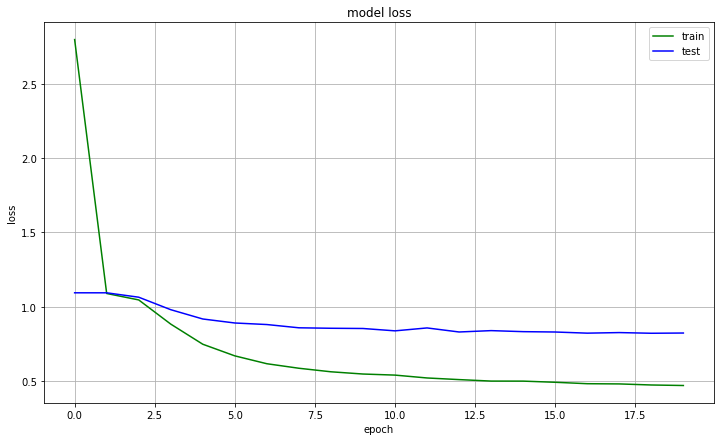

In [61]:
plot_model_loss(History)

In [ ]:
nn_model.predict()